<a href="https://colab.research.google.com/github/raulbenitez/introAI_ICE/blob/main/Tema2_T%C3%A8cniques_d'agrupament.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tema 2: Tècniques d’agrupament no-supervisat (clustering algorithms)

2.1 L'algorisme K-keans

2.2 Agrupament agglomeratiu

2.3 Models de mescla Gaussiana (Gaussian Mixture Models)

# 2.1 L'algorisme K-means:

[1] Especifiqueu el nombre de clústers $k$ que es trobaran a les dades.

[2] Estableix els valors inicials per als centroides del clúster $\mu^0_1,\dots,\mu^0_k$ (a l'atzar o coneixement previ).

[3] Assigna cada observació al cúmul més proper (distància euclídea).

[4] Recalculeu el baricentre de cada clúster a partir de les observacions assignades $\mu^1_1,\dots,\mu^1_k$.

[5] Repetiu els passos 3-4 fins que no hi hagi cap canvi en els centroides. Proporcioneu la agrupació final $\mu^n_1,\dots,\mu^n_k$, on $n$ és el nombre d'iteracions.


### Exemple 1: dades sintètiques

Conjunt de dades sintètic molt simple

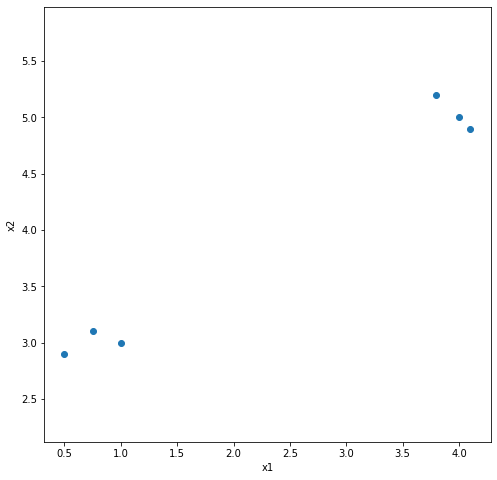

In [1]:
import numpy as np
import matplotlib.pylab as plt
D = np.array([[1,3],[3.8,5.2],[0.5,2.9],[0.75,3.1],[4,5],[4.1,4.9]])

fig = plt.figure(figsize=(8,8))
plt.scatter(D[:,0],D[:,1])
plt.axis('equal')
plt.xlabel('x1')
plt.ylabel('x2')
plt.axis('equal')
plt.show()

In [3]:
D.shape

(6, 2)

In [2]:
from sklearn.cluster import KMeans
group = KMeans(n_clusters=2).fit_predict(D)
print(group)

[1 0 1 1 0 0]


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [4]:
import matplotlib.pylab as plt
import pandas as pd
import seaborn as sns

df = pd.DataFrame(D,columns=['x','y'])
df['kmeans']=group

In [5]:
df.head()

,x,y,kmeans
0,1.00,3.0,1
1,3.80,5.2,0
2,0.50,2.9,1
3,0.75,3.1,1
4,4.00,5.0,0


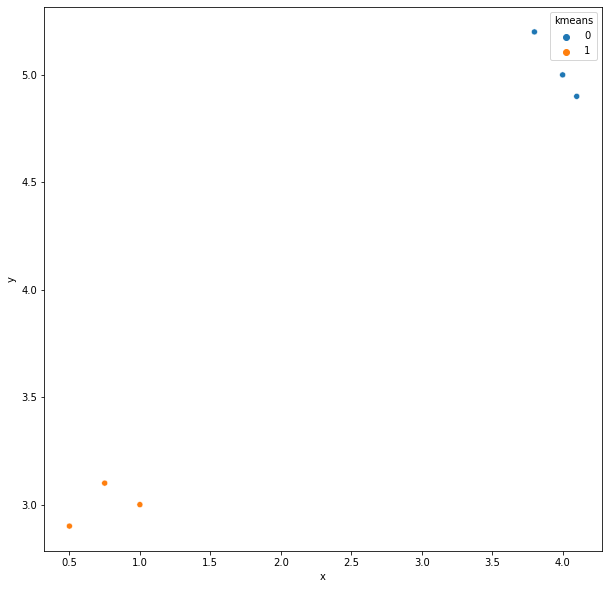

In [6]:
fig = plt.figure(figsize=(10,10)) 
sns.scatterplot(x='x',y='y',hue='kmeans',data=df)
plt.show()

NOTA: Si volem conèixer més detalls sobre els clústers trobats, s'utilitza la funció fit i no fit_predict (és l'última vegada només les etiquetes d'assignació de les observacions a clústers, és dir la predicció de l'algoratge k-means). El detall de variables es pot consultar a https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [7]:
kmeans_result = KMeans(n_clusters=2).fit(D)
print('Etiquetas de asignacion a clusters {}'.format(kmeans_result.labels_))
print('Posición de los centroides de los clusters {}'.format(kmeans_result.cluster_centers_))
print('Número de iteraciones necesarias {}'.format(kmeans_result.n_iter_))

Etiquetas de asignacion a clusters [0 1 0 0 1 1]
Posición de los centroides de los clusters [[0.75       3.        ]
 [3.96666667 5.03333333]]
Número de iteraciones necesarias 2


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### Exemple 2: Clustering the iris dataset

In [12]:
import seaborn as sns 

sns.set(style="ticks", color_codes=True)
iris = sns.load_dataset("iris")

X = iris[['sepal_length','sepal_width','petal_length','petal_width']] # features
y = iris['species'] # class labels

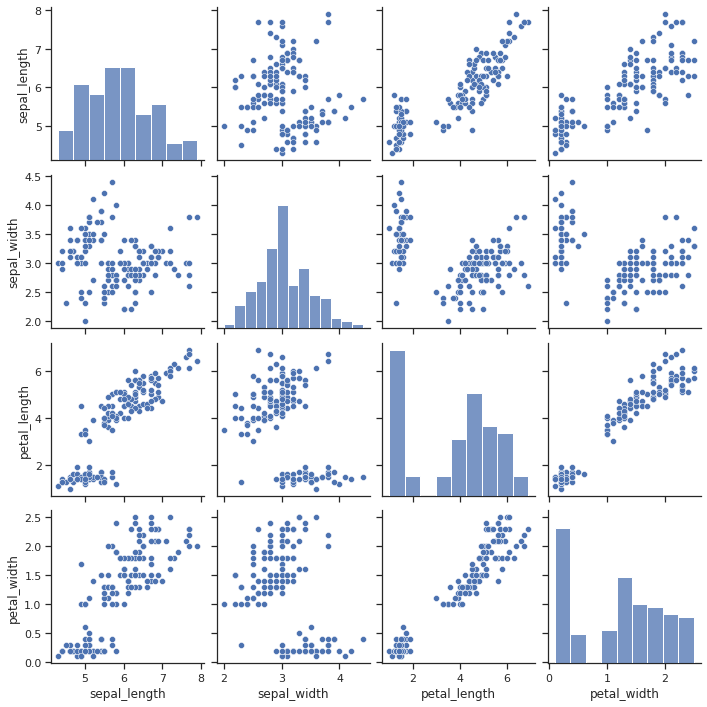

In [14]:
g = sns.pairplot(iris)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


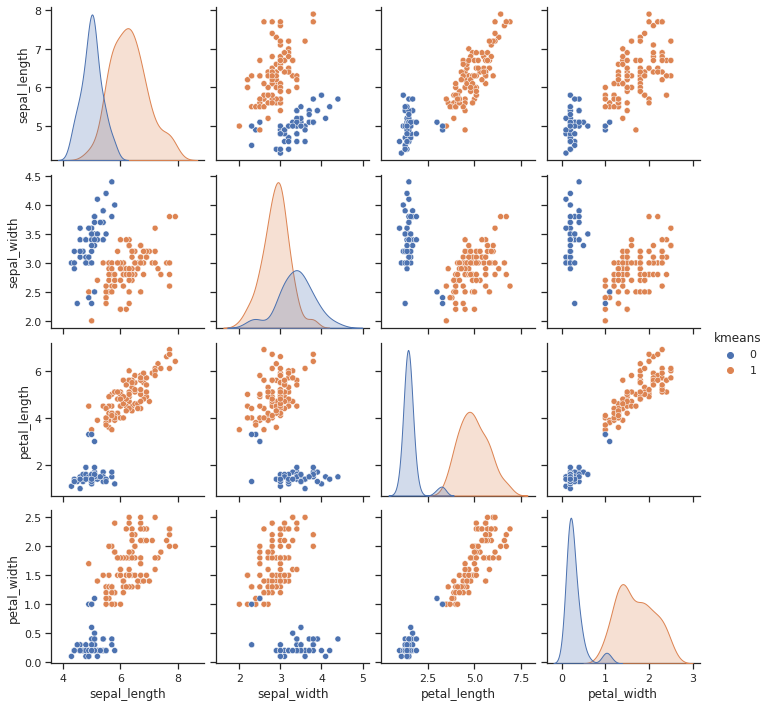

In [15]:
from sklearn.cluster import KMeans
group = KMeans(n_clusters=2).fit_predict(X)

iris_grouped = iris.copy()
iris_grouped['kmeans'] = group
g = sns.pairplot(iris_grouped, hue="kmeans")

Mirem de trobar clusters en les observacions que s'han agrupat com a cluster 1 aplicant un altre cop kmeans

<ipython-input-20-65b8e136305a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop('kmeans',axis=1,inplace=True)


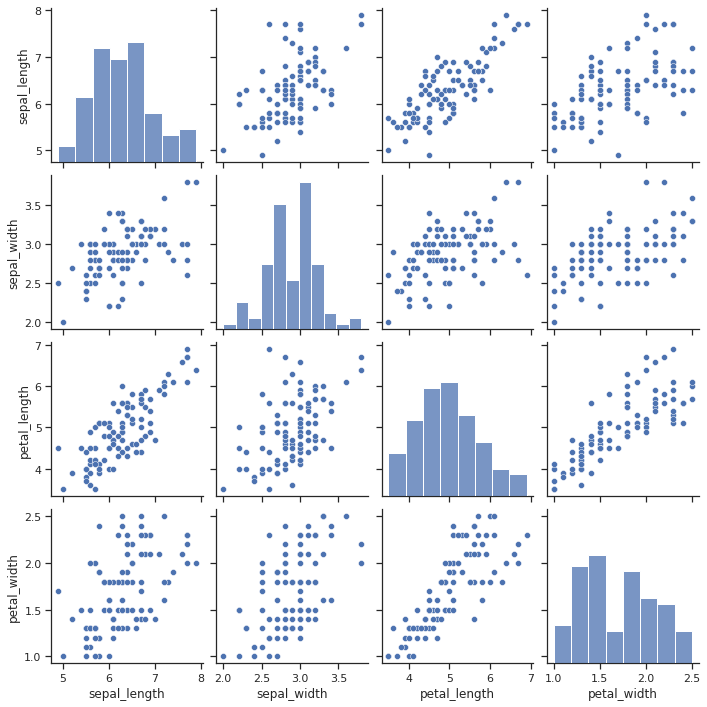

In [20]:
df1 = iris_grouped.copy()
df2 = df1.loc[df1["kmeans"]==1]
df2.drop('kmeans',axis=1,inplace=True)
df2.head()
g = sns.pairplot(df2)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


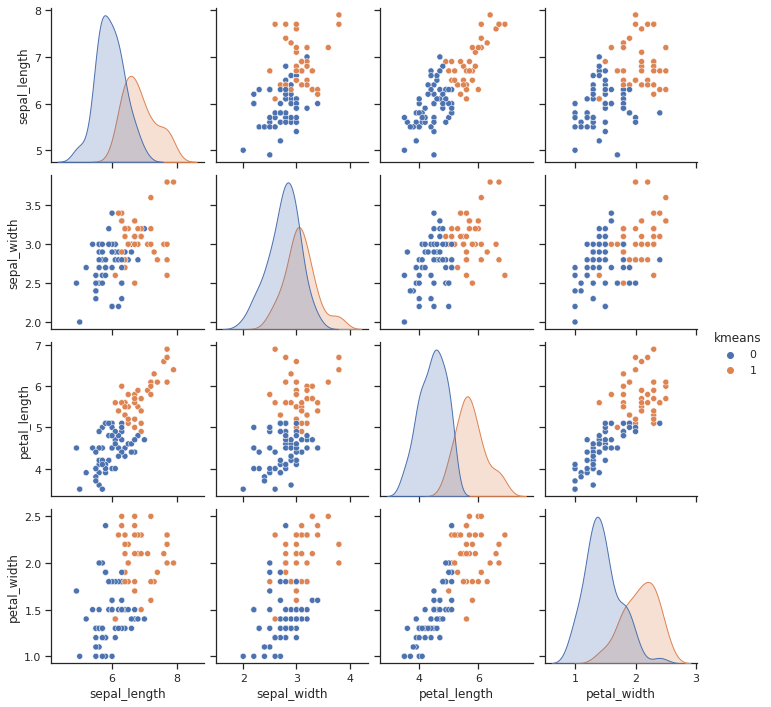

In [21]:
X1 = df2[['sepal_length','sepal_width','petal_length','petal_width']] # features

group1 = KMeans(n_clusters=2).fit_predict(X1)

iris_grouped_1 = df2.copy()
iris_grouped_1['kmeans'] = group1
g = sns.pairplot(iris_grouped_1, hue="kmeans")

### Exemple 3: Núvols de punts aleatoris

Generem dades agrupada en núvols de clústers amb diferents posicions relatives i formes

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, 'k-means simple blobs')

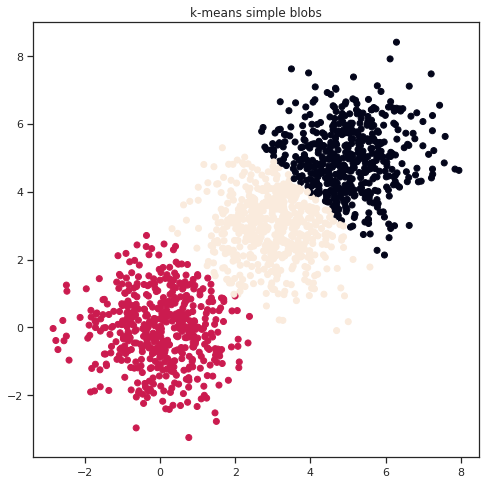

In [40]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

n_samples = 1500
X, y = make_blobs(n_samples=n_samples, centers = [(0,0),(3,3),(5,5)])

y_pred = KMeans(n_clusters=3).fit_predict(X)

plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1],c=y_pred)
plt.title("k-means simple blobs")

Número incorrecte de clústers en l'algorament k-means

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, 'k-means simple blobs')

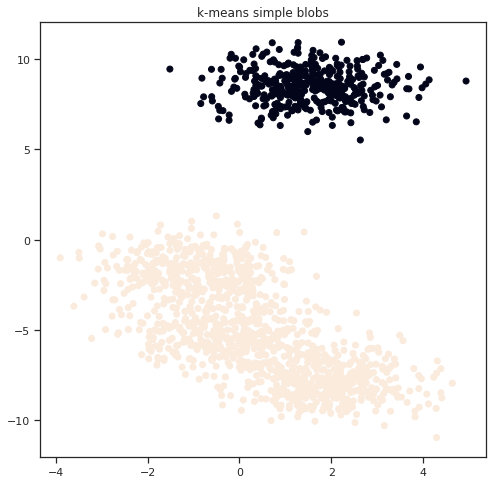

In [30]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

n_samples = 1500
X, y = make_blobs(n_samples=n_samples, centers = 4)

y_pred = KMeans(n_clusters=2).fit_predict(X)

plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("k-means simple blobs")

Núvols amb diferent nombre d'observacions

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, 'k-means simple blobs')

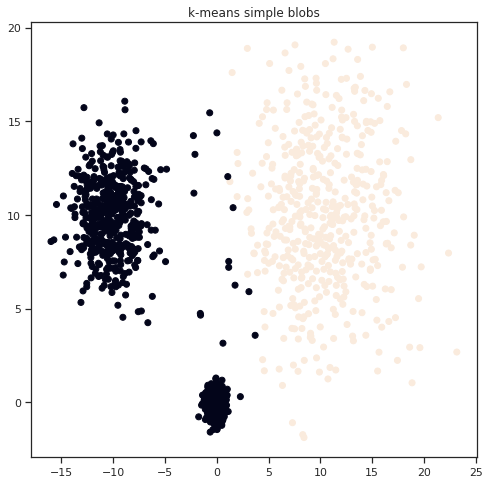

In [31]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

n_samples = 1500
X, y = make_blobs(n_samples=n_samples, centers = [(0,0),(-10,10),(10,10)],cluster_std=(0.5,2,4))

y_pred = KMeans(n_clusters=2).fit_predict(X)

plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("k-means simple blobs")

# 2.2 Agrupament agglomeratiu:

Seqüència de particions de les dades en un conjunt de clústers. Poden ser aglomeratius o divisius. L'algorisme és el següent:

[1] Especifiqueu el nombre de clústers 𝑘 que es trobaran a les dades.

[2] Inicia el nombre de clústers al nombre d'observacions 𝑁 .

[3] Agrupeu els dos clusters més propers en funció d'una distància entre clusters.

[4] Recalculeu el centroide de cada clúster a partir de les observacions assignades 𝜇_1,...,𝜇_{N-1} .

[5] Repetiu els passos 3-4 fins que el nombre de clústers sigui 𝑘 .




### Exemple 1: dades sintètiques:

Unes poques observacions en 2D

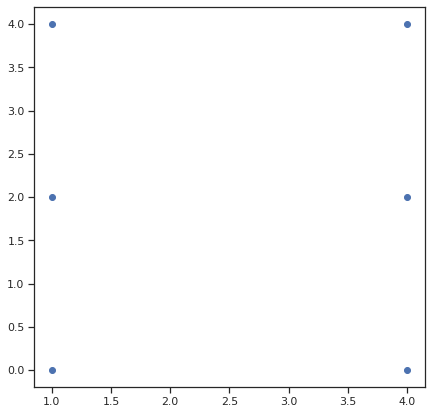

In [32]:
import numpy as np
X = np.array([[1, 2], [1, 4], [1, 0],[4, 2], [4, 4], [4, 0]])

fig = plt.figure(figsize=(7,7))
plt.scatter(X[:, 0], X[:, 1])
plt.show()

Apliquem el clustering jerárquico aglomerativo a les dades buscant dos clústers:

In [33]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=2).fit(X) 
clustering.labels_

array([1, 1, 1, 0, 0, 0])

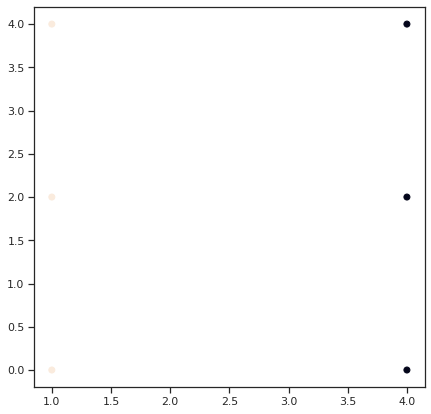

In [34]:
fig = plt.figure(figsize=(7,7))
plt.scatter(X[:, 0], X[:, 1],c=clustering.labels_)
plt.show()

Representem el drendrograma

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [45.0, 45.0, 55.0, 55.0],
  [35.0, 35.0, 50.0, 50.0],
  [12.5, 12.5, 42.5, 42.5]],
 'dcoord': [[0.0, 2.0, 2.0, 0.0],
  [0.0, 2.0, 2.0, 2.0],
  [0.0, 2.0, 2.0, 0.0],
  [0.0, 2.0, 2.0, 2.0],
  [2.0, 3.0, 3.0, 2.0]],
 'ivl': ['2', '0', '1', '5', '3', '4'],
 'leaves': [2, 0, 1, 5, 3, 4],
 'color_list': ['C1', 'C1', 'C2', 'C2', 'C0'],
 'leaves_color_list': ['C1', 'C1', 'C1', 'C2', 'C2', 'C2']}

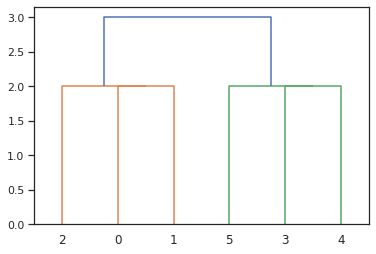

In [35]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(X)
dendrogram(Z) 

### Exemple 2: Núvols de punts aleatoris

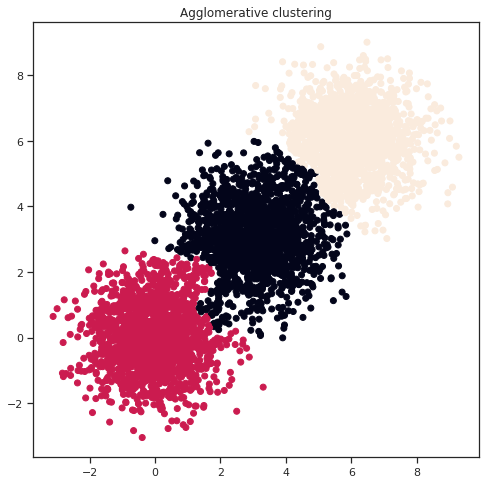

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs

# Genera datos aleatoriamente en dos grupos localizados en posiciones diferentes:
n_samples = 5000
centers = [(0, 0), (3, 3),(6,6)]
X, y = make_blobs(n_samples=n_samples, centers=centers, n_features=2,random_state=0)

clustering = AgglomerativeClustering(n_clusters=3).fit(X) 

plt.figure(figsize=(8, 8))
labels = clustering.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.title("Agglomerative clustering")
plt.show()

# 2.3 Models de mescla Gaussiana (Gaussian Mixture Models) 

Modelem la distribució de les observacions multidimensionals utilitzant una barreja de distribucions gaussianes:

  ## $p(\vec{x}) = \sum_{i=1}^G \pi_i N(\vec{\mu_i},\Sigma_i)$

  ## $\sum_{i=1}^G \pi_i, 0\le \pi_i \le 1$

### Exemple 1: Núvols aleatoris

<Figure size 864x864 with 0 Axes>

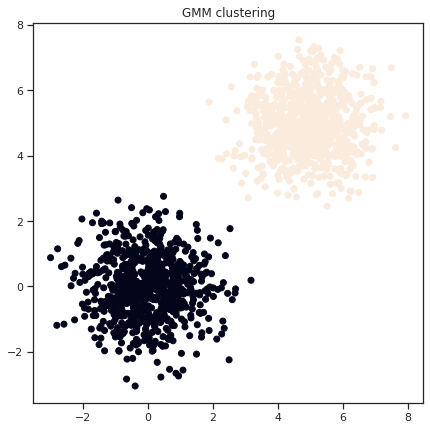

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import mixture

plt.figure(figsize=(12, 12))

n_samples = 1500
centers = [(0, 0), (5, 5)]
X, y = make_blobs(n_samples=n_samples, centers=centers, n_features=2,random_state=0)
gmm = mixture.GaussianMixture(n_components=2,covariance_type='full')

plt.figure(figsize=(7,7))
labels = gmm.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.title("GMM clustering")
plt.show()

### Exemple 2: Núvols anisotròpics

<Figure size 864x864 with 0 Axes>

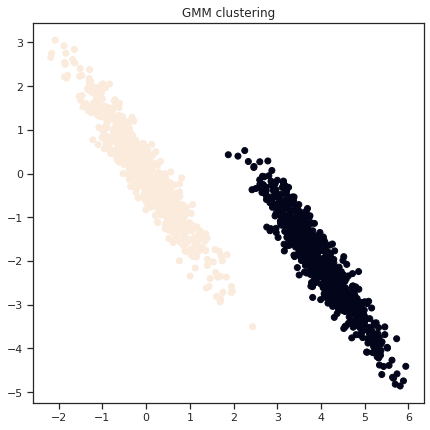

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import mixture

plt.figure(figsize=(12, 12))

n_samples = 1500
centers = [(0, 0), (10, 5)]
X, y = make_blobs(n_samples=n_samples, centers=centers, n_features=2,random_state=0)
# Anisotropicly distributed data
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)

gmm = mixture.GaussianMixture(n_components=2,covariance_type='full')

plt.figure(figsize=(7,7))
labels = gmm.fit_predict(X_aniso)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=labels)
plt.title("GMM clustering")
plt.show()


## Sel.lecció de models: Quants clusters?:

ïndex de parsimònia per la selecció de models probabilístics:

${\displaystyle \mathrm {BIC} =k\ln(n)-2\ln({\widehat {L}})\ }$

El primer terme penalitza per complexitat, el segon té en compte l'error de predicció del model (MSE-versemblança)

[9361.894157026747]
[9361.894157026747, 8136.914154911657]
[9361.894157026747, 8136.914154911657, 8037.644655568277]
[9361.894157026747, 8136.914154911657, 8037.644655568277, 8016.816680297278]
[9361.894157026747, 8136.914154911657, 8037.644655568277, 8016.816680297278, 8059.044196220728]
[9361.894157026747, 8136.914154911657, 8037.644655568277, 8016.816680297278, 8059.044196220728, 8100.064550953897]
[9361.894157026747, 8136.914154911657, 8037.644655568277, 8016.816680297278, 8059.044196220728, 8100.064550953897, 8143.03641035435]
[9361.894157026747, 8136.914154911657, 8037.644655568277, 8016.816680297278, 8059.044196220728, 8100.064550953897, 8143.03641035435, 8178.047733070092]
[9361.894157026747, 8136.914154911657, 8037.644655568277, 8016.816680297278, 8059.044196220728, 8100.064550953897, 8143.03641035435, 8178.047733070092, 8216.518775708679]
[9361.894157026747, 8136.914154911657, 8037.644655568277, 8016.816680297278, 8059.044196220728, 8100.064550953897, 8143.03641035435, 8178.0

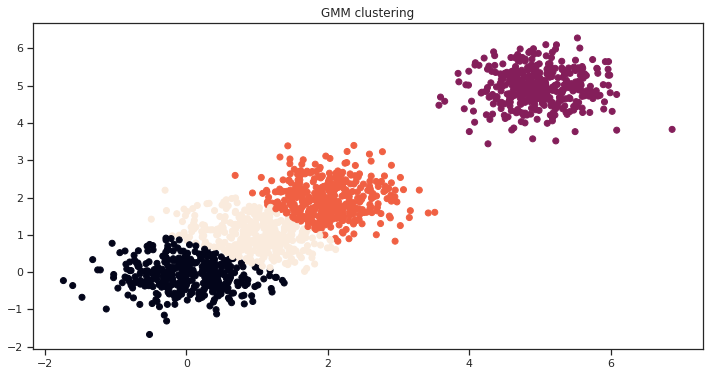

In [46]:
from sklearn.datasets import make_blobs
import numpy as np

n_clusters = 4
n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, centers=[[1,1],[0,0],[2,2],[5,5]], cluster_std = [0.5,0.5,0.5,0.5], n_features=2,random_state=random_state)

NMAX = 10
bic = []
for kG in np.arange(1,NMAX+1):
    gmm = mixture.GaussianMixture(n_components=kG,covariance_type='full').fit(X)
    bic.append(gmm.bic(X))
    print(bic)

idx_winner = np.argmin(bic)
print('...and the winner is GMM model G = {}'.format(idx_winner+1))
gmm = mixture.GaussianMixture(n_components=idx_winner+1,covariance_type='full').fit(X)

fig = plt.figure(figsize=(12,6))
y_pred_gmm = gmm.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred_gmm)
plt.title("GMM clustering")
plt.show()

# 2.4 Avaluació de tècniques d'agrupament

Agrupem les dades amb els tres mètodes i comparem quin és el que proporciona millors resultats


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


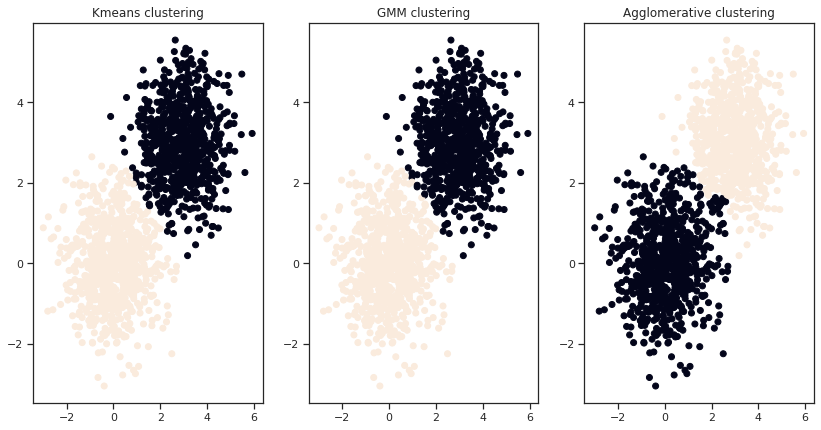

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn import mixture

# Generate data:
n_samples = 1500
centers = [(0, 0), (3, 3)]
X, y = make_blobs(n_samples=n_samples, centers=centers, n_features=2,random_state=0)

# Kmeans clustering:
# Incorrect number of clusters
clust_kmeans = KMeans(n_clusters=2, random_state=random_state).fit_predict(X)

# Agglomerative clustering:
clust_agg = AgglomerativeClustering(n_clusters=2).fit_predict(X) 

# GMM clustering:
clust_gmm = mixture.GaussianMixture(n_components=2,covariance_type='full').fit_predict(X)

plt.figure(figsize=(14,7))

ax0 = plt.subplot(1,3,1)
plt.scatter(X[:, 0], X[:, 1], c=clust_kmeans)
plt.title("Kmeans clustering")

ax1 = plt.subplot(1,3,2)
plt.scatter(X[:, 0], X[:, 1], c=clust_gmm)
plt.title("GMM clustering")

ax2 = plt.subplot(1,3,3)
plt.scatter(X[:, 0], X[:, 1], c=clust_agg)
plt.title("Agglomerative clustering")
plt.show()

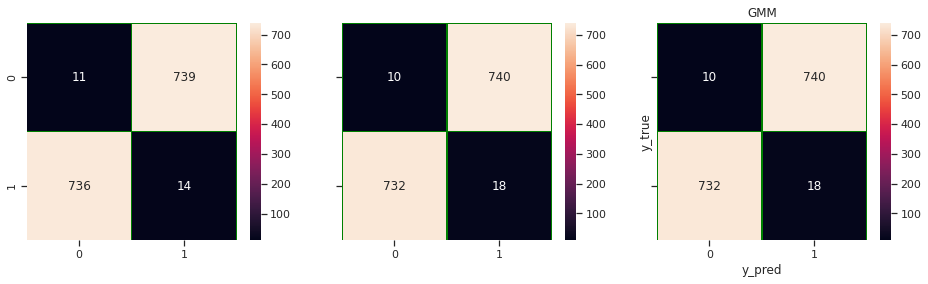

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm1 = confusion_matrix(y,clust_kmeans)
cm2 = confusion_matrix(y,clust_agg)
cm3 = confusion_matrix(y,clust_gmm)

fig, ax = plt.subplots(1, 3, figsize=(16, 4),sharey=True)

sns.heatmap(cm1,annot = True,linewidths=0.5,linecolor="green",fmt = ".0f",ax=ax[0])
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title('Kmeans')

sns.heatmap(cm3,annot = True,linewidths=0.5,linecolor="green",fmt = ".0f",ax=ax[1])
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title('Agglomerative')

sns.heatmap(cm3,annot = True,linewidths=0.5,linecolor="green",fmt = ".0f",ax=ax[2])
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title('GMM')
plt.show()

Adjusted Rand Score

In [48]:
from sklearn.metrics.cluster import rand_score

rand_kmeans = rand_score(y,clust_kmeans)
rand_agglo = rand_score(y,clust_agg)
rand_gmm = rand_score(y,clust_gmm)

print('Kmeans SCORE: {}'.format(rand_kmeans))
print('Agglomerative SCORE: {}'.format(rand_agglo))
print('GMM SCORE: {}'.format(rand_gmm))
    

Kmeans SCORE: 0.9672003557927508
Agglomerative SCORE: 0.9442730709361796
GMM SCORE: 0.9633391149655326


# Exercici: Agrupament de les dades dels Pingüins de l'Antàrtida